In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [7]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


8219 rows and 4 columns

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.
   

In [8]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [9]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247



7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?
   

In [10]:
gdp_df.Year.nunique()

34

In [11]:
count_country=gdp_df.value_counts(['Country']).reset_index()
count_country

,Country,count
0,Africa Eastern and Southern,34
1,Africa Western and Central,34
2,Albania,34
3,Andorra,34
4,Algeria,34
...,...,...
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13


In [12]:
count_country.columns=['Country','Count']

In [13]:
len(count_country.loc[count_country.Count ==gdp_df.Year.nunique()])

228

228 countries have all the data

In [14]:
len(count_country.loc[count_country.Count !=gdp_df.Year.nunique()])

19

Countries which have all years data are 228. Countries which are missingmany years data are 19. GDP per capita has been increasing by year


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [15]:
gdp_2020=gdp_df.loc[(gdp_df.Year==2020)]

In [16]:
gdp_2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

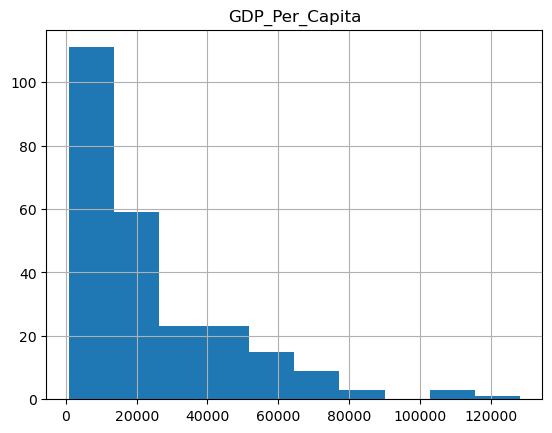

In [17]:
gdp_2020.hist('GDP_Per_Capita')


<Axes: ylabel='GDP_Per_Capita'>

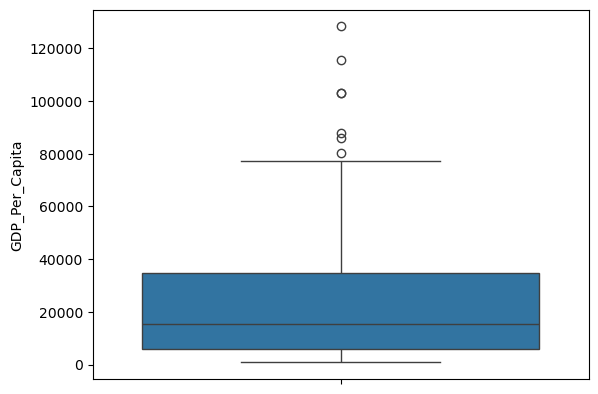

In [18]:
sns.boxplot(data = gdp_2020, y='GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

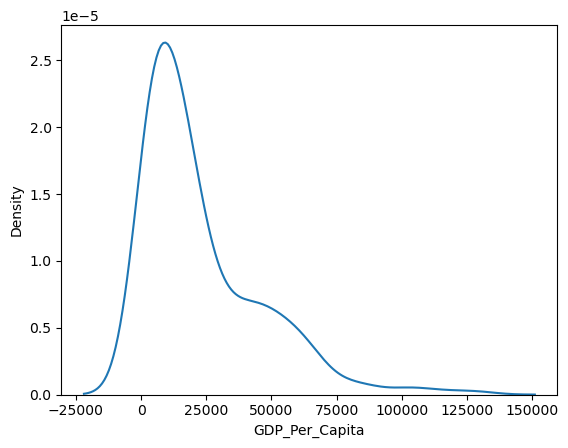

In [19]:
sns.kdeplot(gdp_2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

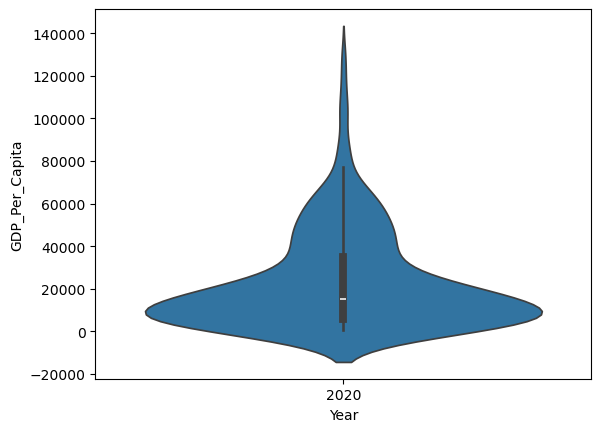

In [20]:
sns.violinplot(data = gdp_2020,x='Year', y='GDP_Per_Capita')

9. What was the median GDP per capita value in 2020?

In [21]:
gdp_2020['GDP_Per_Capita'].median()


15309.23598817024

Median is 15309.23598817024

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [22]:
gdp_decades = gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2000) | (gdp_df['Year'] == 2010) |  (gdp_df['Year'] == 2020)]

In [23]:
decades =[1990,2000,2010,2020]

In [24]:
gdp_decades = gdp_df.loc[gdp_df.Year.isin(decades)]

In [25]:
gdp_decades


,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

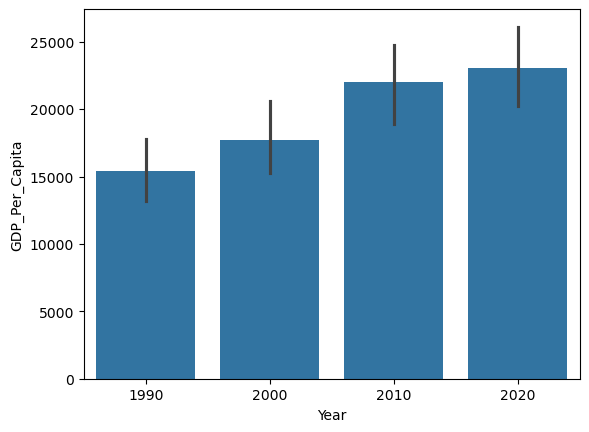

In [26]:
sns.barplot(x = 'Year',y = 'GDP_Per_Capita',data = gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

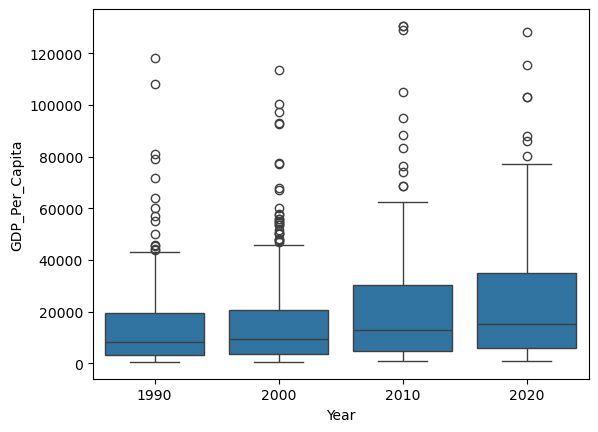

In [27]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

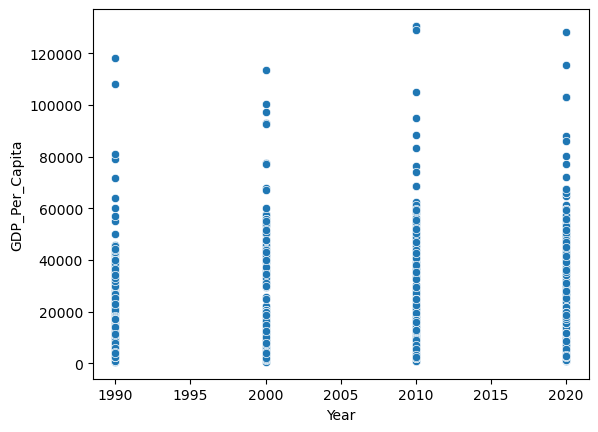

In [28]:
sns.scatterplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

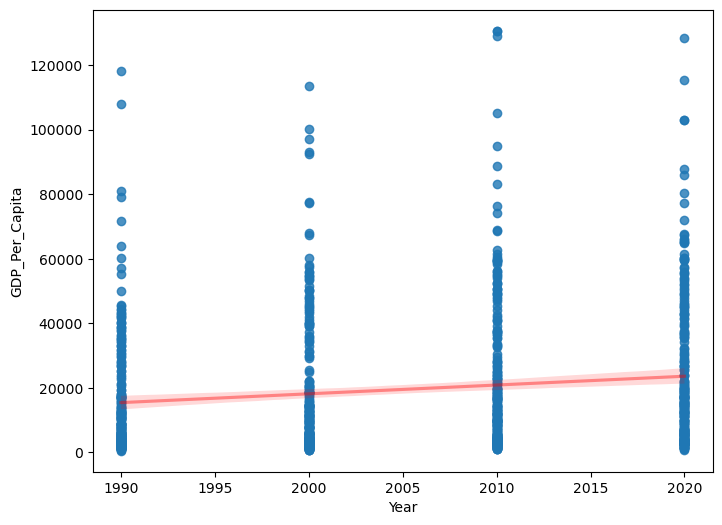

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'],line_kws={'color':'red','alpha':0.4},ax=ax)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

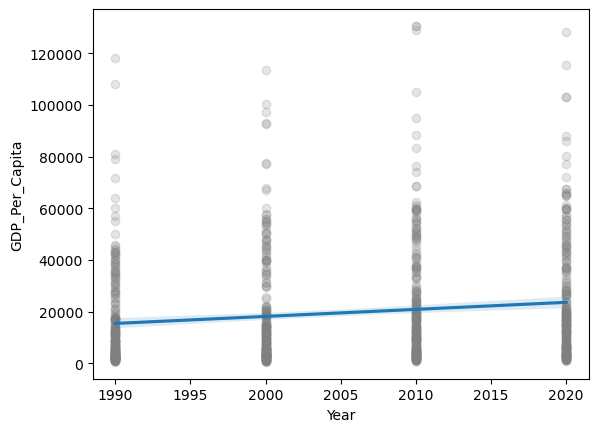

In [30]:
sns.regplot(data=gdp_decades,x='Year',y='GDP_Per_Capita',scatter_kws = {'color':'grey','alpha':0.2})

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

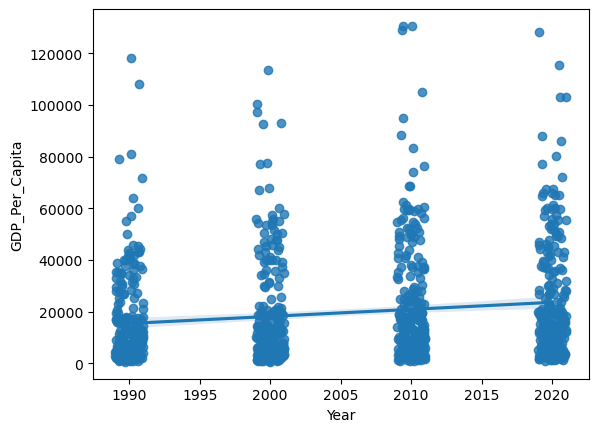

In [31]:
sns.regplot(data=gdp_decades,x='Year',y='GDP_Per_Capita',x_jitter =True)

11. Which country was the first to have a GDP per capita greater than $100,000?
    

In [32]:
gdp_df.loc[gdp_df.GDP_Per_Capita > 100000].sort_values('Year').head(2).Country 

974                   Brunei
7827    United Arab Emirates
Name: Country, dtype: object

Brunei is first to have a GDP per capita greater than 100000

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [33]:
#chris

In [34]:
top_country = gdp_2020.sort_values('GDP_Per_Capita',ascending = False).Country.head(1)   

<Axes: xlabel='Year'>

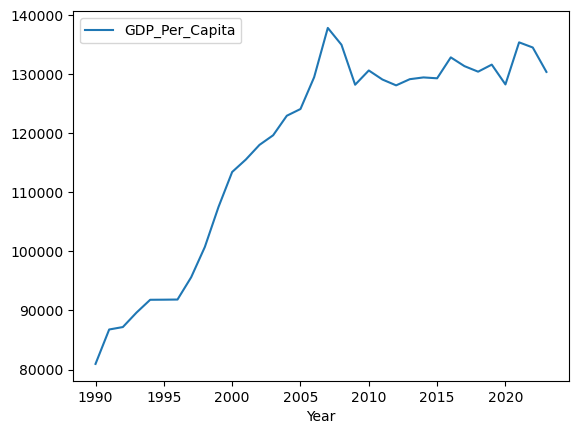

In [35]:
gdp_df.loc[gdp_df.Country.isin(top_country)].plot(kind='line',x='Year')

In [36]:
top_over_time=gdp_df.loc[gdp_df.Country.isin(top_country)]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

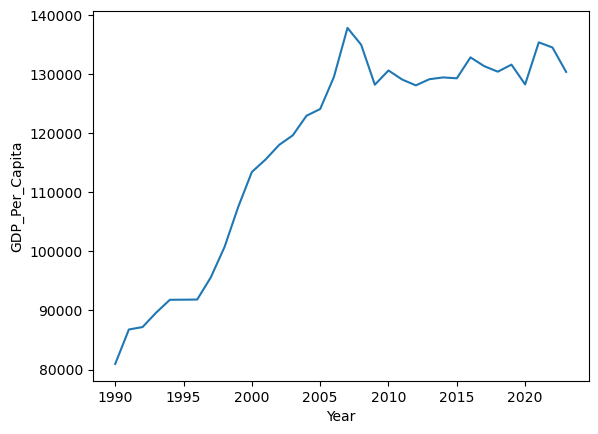

In [37]:
sns.lineplot(data=top_over_time,x='Year',y='GDP_Per_Capita')

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 


In [38]:
lowest_country_GDP =gdp_2020.sort_values('GDP_Per_Capita').Country.head(1)

In [39]:
min_gdp_country = gdp_df.loc[gdp_df['Country'].isin(lowest_country_GDP)]

In [40]:
min_gdp_country

,Country,Year,GDP_Per_Capita
1043,Burundi,2023,828.861074
1044,Burundi,2022,829.387160
1045,Burundi,2021,836.665571
1046,Burundi,2020,833.920257
1047,Burundi,2019,855.732720
1048,Burundi,2018,868.555508
1049,Burundi,2017,880.993440
1050,Burundi,2016,897.459046
1051,Burundi,2015,918.557193
1052,Burundi,2014,977.765840


(0.0, 1466.1674858591664)

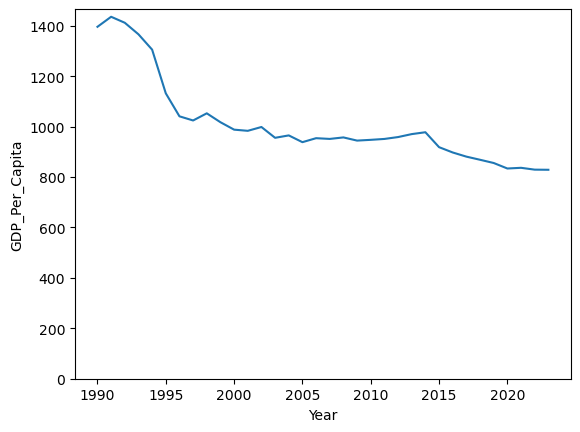

In [41]:
x=min_gdp_country['Year']
y=min_gdp_country['GDP_Per_Capita']
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.plot(x,y)
plt.ylim(bottom=0)

**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [42]:
two_years = gdp_df[(gdp_df['Year']==1990) | (gdp_df['Year']==2020)]
two_years

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
57,Africa Eastern and Southern,1990,3386.854480
61,Africa Western and Central,2020,4622.731427
91,Africa Western and Central,1990,3299.401375
...,...,...,...
8150,World,1990,11207.386344
8154,Zambia,2020,3391.595412
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823


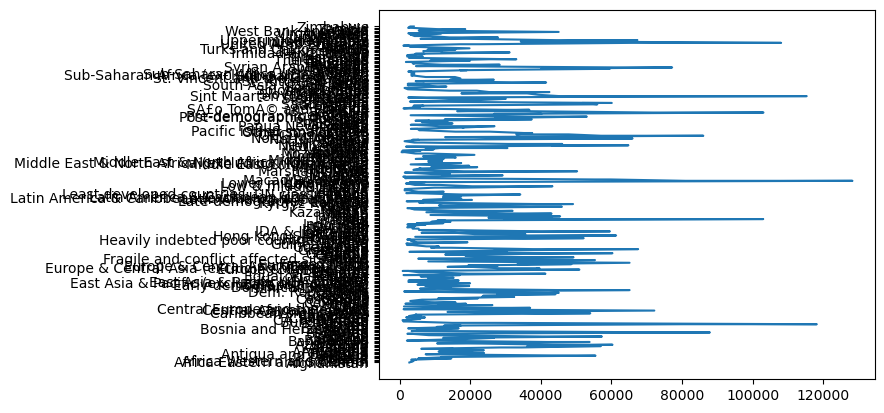

In [43]:
x=two_years['GDP_Per_Capita']
y=two_years['Country']
plt.plot(x,y)

In [44]:
internet_df = pd.read_csv('../data/internet_use.csv', engine = 'python', on_bad_lines = 'skip', skipfooter = 298)

#internet_df = pd.read_csv('internet.csv',nrows = 6083)--chris

In [45]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [46]:
internet_df = internet_df.drop(columns=['Value Footnotes'])

In [47]:
internet_df = internet_df.rename(columns ={'Country or Area':'Country','Value':'Internet_Users_Pct'})

In [48]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?

In [49]:
internet_df['Year'].value_counts()

Year
1990    226
2007    217
2002    214
2008    214
2009    214
2011    214
2001    212
2006    212
2005    212
2000    210
2004    210
2012    209
2010    209
2003    208
1999    207
2016    206
2017    205
2014    204
2015    203
2013    203
1998    195
1997    188
2020    186
2021    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64

17. What is the first year to have a non-zero internet users percentage value?

In [50]:
internet_df.loc[internet_df['Internet_Users_Pct']>0].sort_values('Year')

,Country,Year,Internet_Users_Pct
2034,France,1990,0.052778
3054,Korea (Republic of),1990,0.023265
2192,Germany,1990,0.125892
5150,Spain,1990,0.012874
4197,Norway,1990,0.707299
...,...,...,...
340,Azerbaijan,2023,88.000000
2159,Germany,2023,92.476400
5266,Sweden,2023,95.703300
5586,Türkiye,2023,85.960700


In [51]:
internet_df.Internet_Users_Pct.dtype

dtype('float64')

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [52]:
year_20_14=internet_df[(internet_df['Year']==2000)|(internet_df['Year']==2014)]

In [53]:
year_20_14

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706
...,...,...,...
6017,Yemen,2000,0.082500
6031,Zambia,2014,6.500000
6045,Zambia,2000,0.191072
6061,Zimbabwe,2014,16.364700


In [54]:
year_20_14.sort_values(by='Year').reset_index(drop=True)

,Country,Year,Internet_Users_Pct
0,Trinidad and Tobago,2000,7.721410
1,Zimbabwe,2000,0.401434
2,Tunisia,2000,2.750740
3,Zambia,2000,0.191072
4,Türkiye,2000,3.761690
...,...,...,...
409,Turkmenistan,2014,12.200000
410,Zimbabwe,2014,16.364700
411,Türkiye,2014,51.037400
412,Afghanistan,2014,7.000000


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

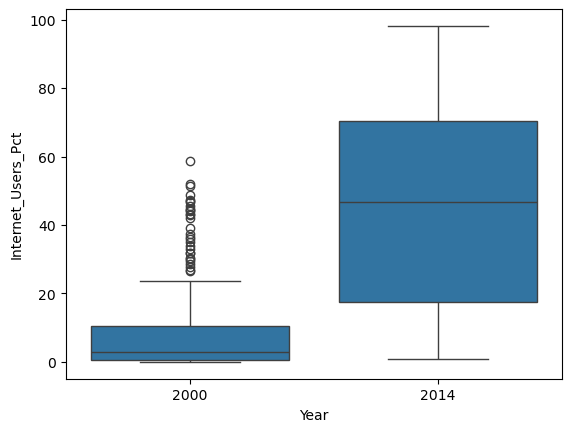

In [55]:
sns.boxplot(x='Year',y='Internet_Users_Pct',data=year_20_14)

19. For how many countries was the percentage of internet users below 5% in 2014?

In [56]:
year_2014 = internet_df.loc[internet_df['Year']==2014]

In [57]:
internet_pct_2014 = year_2014[year_2014['Internet_Users_Pct']<5]

In [58]:
len(internet_pct_2014.Country.value_counts())

10

10 countries are below 5% of internet users in 2014

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


In [59]:
frames = [gdp_df,internet_df]

In [70]:
gdp_and_internet_use=pd.merge(gdp_df,internet_df,on=['Country','Year'])

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [85]:
top_3 = year_2014.sort_values(by='Internet_Users_Pct',ascending =False).Country.head(3)
top_3

2592                        Iceland
1893    Falkland (Malvinas) Islands
602                         Bermuda
Name: Country, dtype: object

In [86]:
top3_gdp=gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(top_3)]
top3_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
537,Bermuda,2017,95666.163117,98.370000
538,Bermuda,2016,92519.400772,98.000000
539,Bermuda,2015,93109.454604,98.323600
540,Bermuda,2014,92298.387811,96.800000
541,Bermuda,2013,95777.858938,95.300000
542,Bermuda,2012,95937.855921,91.299300
543,Bermuda,2011,101174.504104,88.336000
544,Bermuda,2010,105121.639689,84.210000
545,Bermuda,2009,108091.644563,83.250000
546,Bermuda,2008,115015.749469,82.300000


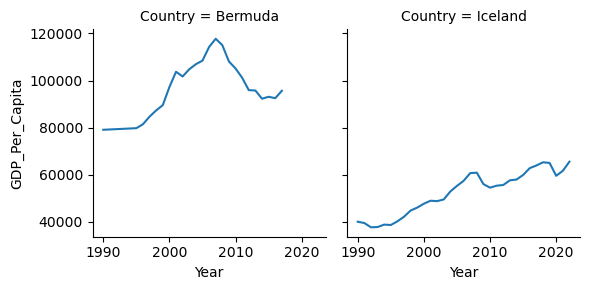

In [87]:
g=sns.FacetGrid(top3_gdp,col='Country')
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [73]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year']==2014]

In [74]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,3017.942544,7.0000
27,Albania,2014,12788.747231,54.3000
56,Algeria,2014,15073.762940,29.5000
85,Andorra,2014,59929.244467,86.1000
112,Angola,2014,10250.592404,21.3623
...,...,...,...,...
4666,Uzbekistan,2014,7145.109807,35.5000
4695,Vanuatu,2014,3320.379187,18.8000
4723,Viet Nam,2014,8751.882806,41.0000
4751,Zambia,2014,3585.577485,6.5000


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

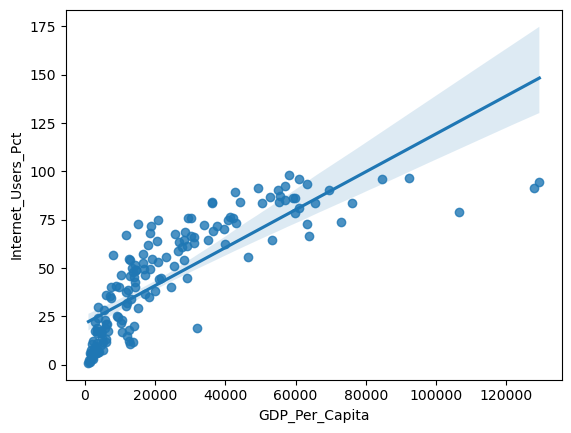

In [75]:
#chris
sns.regplot(data = gdp_and_internet_use_2014,x='GDP_Per_Capita',y='Internet_Users_Pct')

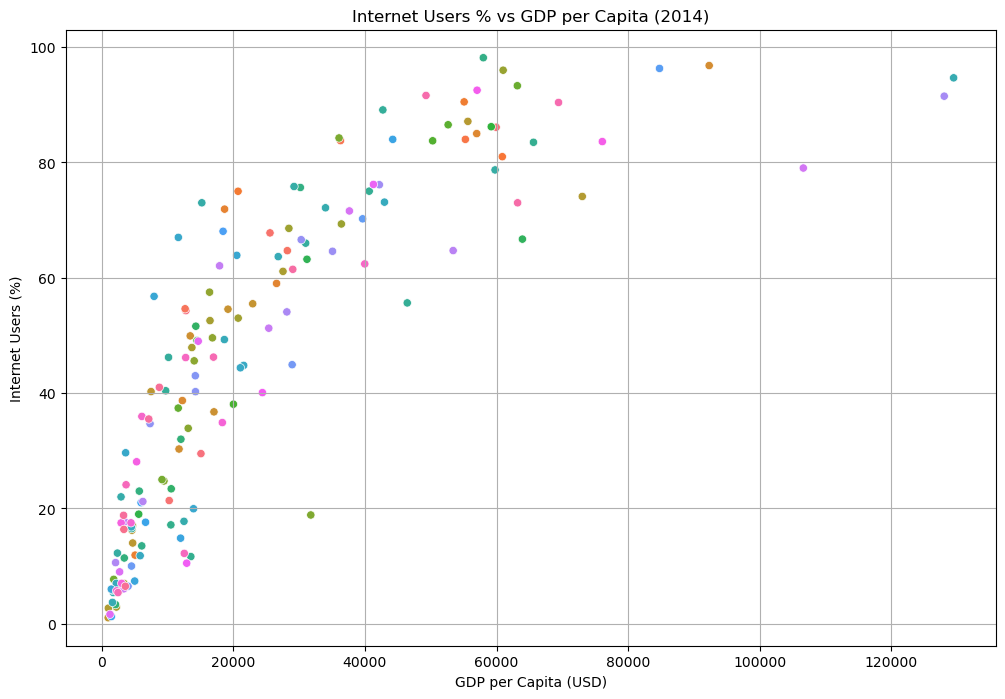

In [76]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=gdp_and_internet_use_2014,
                x='GDP_Per_Capita',
                y='Internet_Users_Pct',
                hue='Country',  # Optional: label outliers
                legend=False)

plt.title('Internet Users % vs GDP per Capita (2014)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Internet Users (%)')
plt.grid(True)
plt.show()


24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".


In [77]:
gdp_and_internet_use_2014.loc[:, 'GDP_group'] = pd.qcut(
    gdp_and_internet_use_2014['GDP_Per_Capita'],
    q=3,
    labels=["low", "medium", "high"]
)


C:\Users\nnavy\AppData\Local\Temp\ipykernel_24312\391786278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014.loc[:, 'GDP_group'] = pd.qcut(


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [78]:
median_internet_by_gdp_group = gdp_and_internet_use_2014.groupby('GDP_group', observed=True)['Internet_Users_Pct'].median()
median_internet_by_gdp_group

GDP_group
low       11.4000
medium    45.5904
high      76.1603
Name: Internet_Users_Pct, dtype: float64